Goal: Given static datset find effect of binary treatment on outcome. 
- effect = amount of outcome due to treatment 
- static? no prediction. no generalization.
- inference (in stats not ml) = relationship between params not prediction 

Point (A): RCT gives causal interpretation to data. 

Why ML? 
- better fit 
 
Why not ML? 
- Not obvious how we get an effect. Black box
- Linear regression is best model in many cases


- https://stats.stackexchange.com/questions/544926/why-do-we-do-matching-for-causal-inference-vs-regressing-on-confounders
- https://stats.stackexchange.com/questions/565783/how-do-we-select-model-for-causal-inference
- - collinearity doesn't affect the predictions. It only affects the coefficient tests and confidence interval.
  - - causal vs predictive context
- regression: causation vs prediciton vs description
    - https://stats.stackexchange.com/questions/464261/regression-causation-vs-prediction-vs-description
- prediction vs estimation what is this difference
    - https://stats.stackexchange.com/questions/17773/what-is-the-difference-between-estimation-and-prediction
- prediction error vs estimation error
    - https://stats.stackexchange.com/questions/409301/what-is-the-relationship-between-minimizing-prediction-error-versus-parameter-es/487748#487748
- Endogeneity = main problem of causal inference. error term ovb not reg error correlated to explanator var
- An estimator uses data to guess at a parameter while a predictor uses the data to guess at some random value that is not part of the dataset
- Regression and Causation: A Critical Examination of Six Econometrics Textbooks - Chen and Pearl (2013).
- checking for endogenity
- https://stats.stackexchange.com/questions/484914/regression-and-the-cef/484930#484930
    - even knowing cef we might us a linear regression for interpretable coefficients
- linear regression is linear in paramters, not variables
- In all models used in this section, we make the strong assumption that the relationships
between variables are linear, and that all error terms have Gaussian (or “normal”) distributions
(in some cases, we only need to assume symmetric distributions). This assumption provides an enormous simplification of the procedure needed for causal analysis
- path coefficient vs regression coefficients
- disturbances vs ovb
- strucutred equation model error term != regression reror term
- - https://www.datascienceassn.org/sites/default/files/CAUSAL%20INFERENCE%20IN%20STATISTICS.pdf
    - PGJ -> fast intro
- Causal Inference for Statistics, Social, and Biomedical Sciences - Guido W. Imbens, Donald B. Rubin
- causal inference what if james m robins

this is very interesting right: 
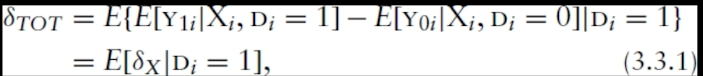
^ his is stratification 

regression is variance weighitng matching whereas matching is based on distribution of X 

and a bit more:

Omitting polynomial terms when they are needed to accurately represent the relationship between confounders and the outcome can affect more than just the confidence intervals of your estimated Average Treatment Effect (ATE). It can also impact the direction and magnitude of the estimated ATE. Here's how this plays out:

Bias in Estimated Coefficients: If the true relationship between a confounder and the outcome is nonlinear, but a linear model is used without the necessary polynomial terms, this can lead to biased estimates of the coefficients for both the confounders and the treatment variable. This bias occurs because the model incorrectly specifies how changes in the confounder are associated with changes in the outcome, leading it to also incorrectly estimate how changes in the treatment affect the outcome.
Magnitude and Direction of the ATE: The magnitude and even the direction of the ATE can be wrongly estimated if important nonlinearities are ignored. For example, if the effect of a confounder on the outcome increases exponentially rather than linearly (which could be the case for variables like age or income in economic models), failing to include a squared term (or other appropriate polynomial form) could lead the regression model to attribute some of the effects of the confounder to the treatment effect, or vice versa. This misattribution can make the treatment seem more or less effective than it truly is.

^ if this is true can we do some form of partialling out with a flexible model ?

In [ ]:
# simplest case, have treatment and response.

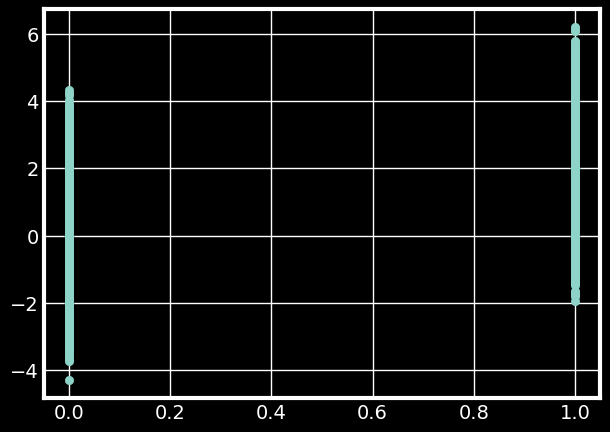

In [87]:
N= 100000
T = np.zeros(N)
mask = np.random.rand(N) < 0.5
T[mask] = 1
Y_0 = np.random.normal(0, 1, N)
Y_1 = np.random.normal(2, 1, N)
Y = Y_0
Y[mask] = Y_1[mask]
plt.scatter(T, Y)

In [88]:
np.mean(Y[mask == 0]), np.mean(Y[mask == 1])

(0.0024303218802698384, 2.0035717820212873)

In [89]:
ATE = np.mean(Y[mask == 1]) - np.mean(Y[mask == 0])
ATE

2.0011414601410173

In [90]:
X = np.random.randint(0,10,N)
X

array([4, 8, 1, ..., 1, 5, 1])

In [91]:
probabilities_of_zero = 0.1 + 0.08 * X
T = (np.random.rand(N) < probabilities_of_zero).astype(int)
T

array([1, 1, 1, ..., 1, 1, 0])

In [92]:
Y = np.random.normal(loc=X+T, scale=1)
Y

array([4.15664975, 9.88523482, 4.25435454, ..., 1.64859961, 4.34434455,
       1.50939226])

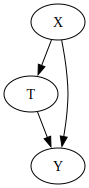

In [93]:
import graphviz as gr

g = gr.Digraph()

g.edge("X", "T"), g.edge("T", "Y"), g.edge("X", "Y")

g

- cofounder 

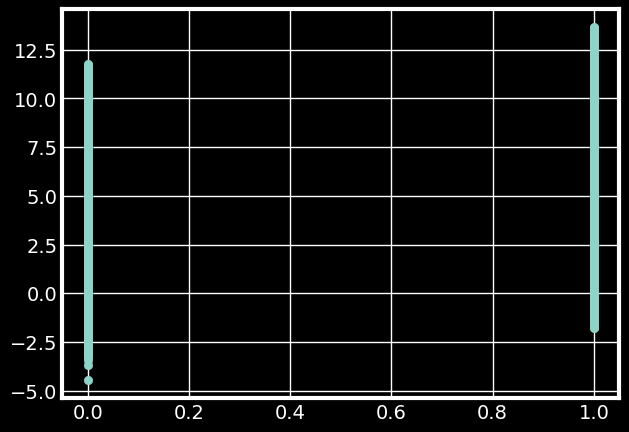

In [94]:
plt.scatter(T,Y)

In [95]:
np.mean(Y[T == 1]) - np.mean(Y[T == 0])

3.6486711810834485

- stratification 

In [105]:
effects = 0
for i in range(10):
    mask = X == i
    treated_mask = np.logical_and(T == 1, mask)
    untreated_mask = np.logical_and(T == 0, mask)
    effects += np.mean(Y[treated_mask]) - np.mean(Y[untreated_mask])
effects / 10

0.9902421954179477

In [96]:
data = pd.DataFrame(data=np.vstack([X,Y,T]).T, columns=['X','Y','T'])
data

,X,Y,T
0,4.0,4.156650,1.0
1,8.0,9.885235,1.0
2,1.0,4.254355,1.0
3,9.0,8.481251,1.0
4,6.0,6.508534,0.0
...,...,...,...
99995,5.0,3.056837,0.0
99996,6.0,5.492648,1.0
99997,1.0,1.648600,1.0
99998,5.0,4.344345,1.0


In [97]:
result = smf.ols('Y ~ T', data=data).fit()
result.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,3.2948,0.012,279.054,0.000,3.272,3.318
T,3.6487,0.017,210.074,0.000,3.615,3.683


In [98]:
result = smf.ols('Y ~ T + X', data=data).fit()
result.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.0052,0.006,0.877,0.380,-0.006,0.017
T,0.9901,0.007,138.040,0.000,0.976,1.004
X,0.9997,0.001,803.111,0.000,0.997,1.002


In [24]:
from data_loader import load 

import numpy as np
import matplotlib.pyplot as plt 
plt.style.use('dark_background')
import seaborn as sns
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf


data = load("online_classroom.csv").query("format_blended==0")
data

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000
5,0,1.0,0.0,0.0,0.0,0.0,0.0,1,0.0,88.34996
7,1,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,90.00000
...,...,...,...,...,...,...,...,...,...,...
316,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,91.65000
317,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,84.99000
319,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,70.05000
320,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,66.69000


(array([ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  6., 13.,
        18., 26., 34., 38., 42., 28.,  5.]),
 array([ 0.   ,  4.834,  9.668, 14.502, 19.336, 24.17 , 29.004, 33.838,
        38.672, 43.506, 48.34 , 53.174, 58.008, 62.842, 67.676, 72.51 ,
        77.344, 82.178, 87.012, 91.846, 96.68 ]),
 <BarContainer object of 20 artists>)

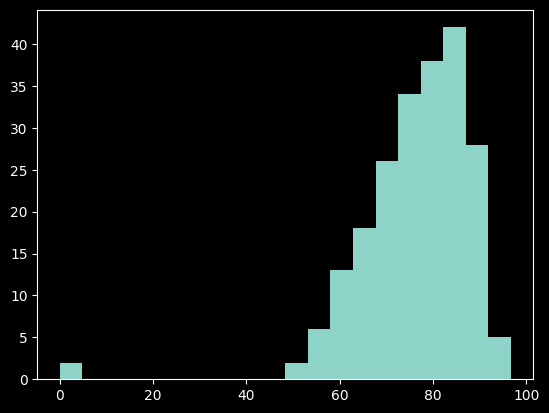

In [4]:
plt.hist(data.falsexam, bins=20)

- $\beta_0 = E[Y | T = 0]$
- $\beta_0 + \beta_1 = E[Y | T = 1]$

In [7]:
result = smf.ols('falsexam ~ format_ol', data=data).fit()
result.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,78.5475,1.113,70.563,0.000,76.353,80.742
format_ol,-4.9122,1.680,-2.925,0.004,-8.223,-1.601


In [9]:
np.mean(data.falsexam[data.format_ol == 0])

78.54748458333333

In [17]:
np.mean(data.falsexam[data.format_ol == 1]) - np.mean(data.falsexam[data.format_ol == 0]) 

-4.912221498226955

In [20]:
wage = load('wage.csv')

In [21]:
model_1 = smf.ols('np.log(hwage) ~ educ', data=wage.assign(hwage=wage["wage"]/wage["hours"])).fit()
model_1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.2954,0.089,25.754,0.000,2.121,2.470
educ,0.0529,0.007,8.107,0.000,0.040,0.066


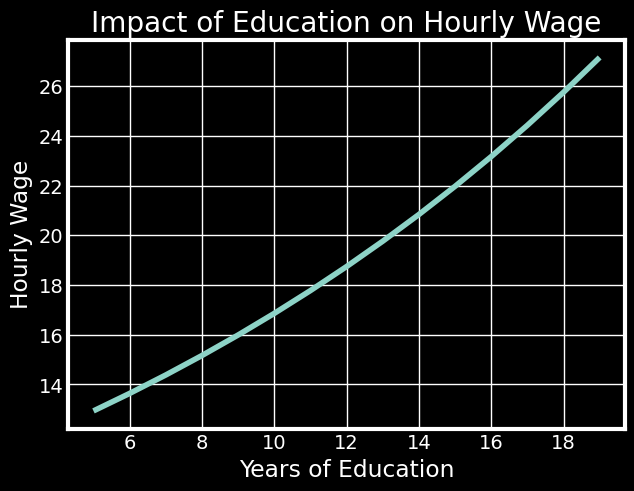

In [25]:
from matplotlib import pyplot as plt
from matplotlib import style


x = np.array(range(5, 20))
plt.plot(x, np.exp(model_1.params["Intercept"] + model_1.params["educ"] * x))
plt.xlabel("Years of Education")
plt.ylabel("Hourly Wage")
plt.title("Impact of Education on Hourly Wage")
plt.show()